In [3]:
import pandas as pd
df = pd.read_csv("da.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Timestamp,Heart_rate
0,1023274005,102.0
1,1023274006,103.0
2,1023274007,101.0
3,1023274008,101.0
4,1023274009,102.0
...,...,...
4258,1022410323,136.0
4259,1022410359,136.0
4260,1022410359,137.0
4261,1022410359,145.0


In [6]:
import random
hand = []
ds = [int(dt.iloc[k,1]) for k in range(len(df))]
print(ds)
print(len(ds))
for i in ds:
    if i >= 135:
        hand.append(int(random.uniform(i-(0.15*i), i+(0.15*i))))
    else:
        hand.append(int(random.uniform(i-(0.05*i), i+(0.05*i))))

[102, 103, 101, 101, 102, 102, 102, 102, 102, 102, 103, 103, 101, 102, 102, 101, 100, 101, 100, 101, 102, 103, 103, 101, 101, 100, 101, 101, 101, 101, 102, 102, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 103, 102, 103, 103, 103, 102, 102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 103, 102, 101, 101, 100, 99, 98, 97, 96, 96, 96, 96, 96, 96, 96, 96, 97, 98, 99, 100, 101, 101, 102, 102, 102, 102, 102, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 101, 101, 100, 100, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 98, 98, 99, 99, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 100, 101, 101, 101, 102, 102, 102, 103, 104, 105, 105, 105, 105, 104, 104, 104, 104, 103, 103, 102, 102, 101, 100, 99, 99, 99, 99, 99, 100, 100, 100, 99, 99, 99, 99, 99, 99, 100, 100, 99, 99, 99, 99, 100, 100, 100, 101, 100, 100, 101, 101, 101, 101, 103, 101, 101,

In [7]:
df['Heart_rate_hand'] = hand
df

,Timestamp,Heart_rate,Heart_rate_hand
0,1023274005,102.0,100
1,1023274006,103.0,107
2,1023274007,101.0,105
3,1023274008,101.0,97
4,1023274009,102.0,102
...,...,...,...
4258,1022410323,136.0,128
4259,1022410359,136.0,138
4260,1022410359,137.0,136
4261,1022410359,145.0,153


Построение модели:

In [8]:
dm = df.copy(deep=True)
dm

,Timestamp,Heart_rate,Heart_rate_hand
0,1023274005,102.0,100
1,1023274006,103.0,107
2,1023274007,101.0,105
3,1023274008,101.0,97
4,1023274009,102.0,102
...,...,...,...
4258,1022410323,136.0,128
4259,1022410359,136.0,138
4260,1022410359,137.0,136
4261,1022410359,145.0,153


In [9]:
dm['Timestamp'] = dm['Timestamp'].astype('int64')
dm['Heart_rate'] = dm['Heart_rate'].astype('int64')

In [10]:
X = dm[['Timestamp','Heart_rate_hand']]
y = dm['Heart_rate']

In [11]:
dm

,Timestamp,Heart_rate,Heart_rate_hand
0,1023274005,102,100
1,1023274006,103,107
2,1023274007,101,105
3,1023274008,101,97
4,1023274009,102,102
...,...,...,...
4258,1022410323,136,128
4259,1022410359,136,138
4260,1022410359,137,136
4261,1022410359,145,153


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=50)

In [114]:
#from sklearn import *
#model_SVM = svm.SVR()
#model_SVM.fit(X_train, y_train)
#y_pred_SVM = model_SVM.predict(X_test)

In [115]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
predict_rf = rf.predict(X_test)

In [116]:
metrics.mean_squared_error(y_test, predict_rf)

15.618803445491729

In [117]:
#metrics.mean_squared_error(y_test, y_pred_SVM)

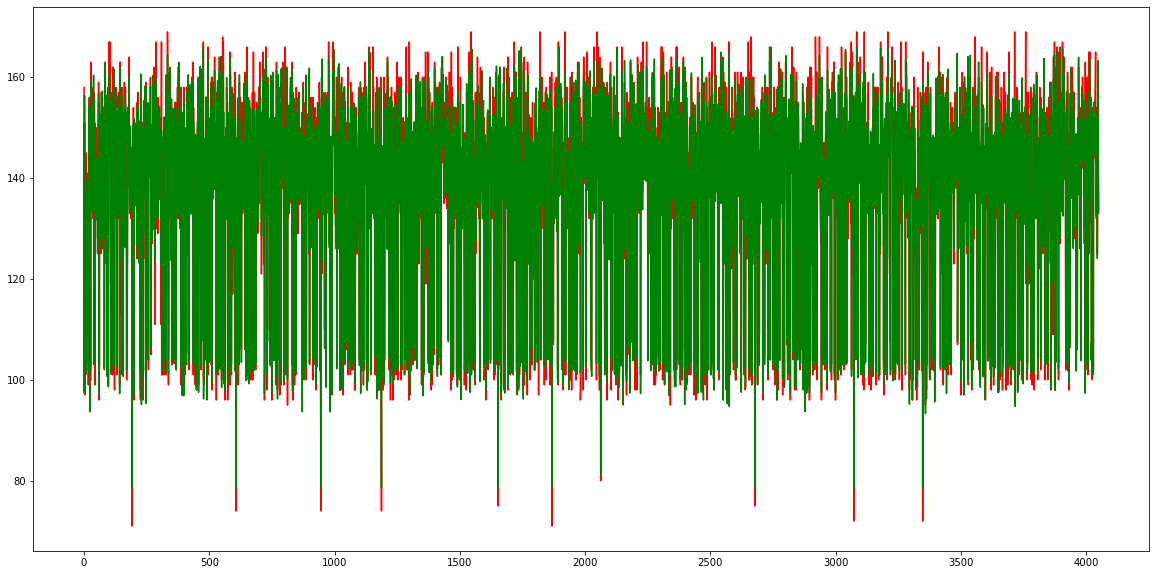

In [118]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(range(len(y_test)), y_test, 'r') # plotting t, a separately 
plt.plot(range(len(predict_rf)), predict_rf, 'g') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [119]:
import pandas as pd
dl = pd.read_csv("2022-03-08-17-01-29.csv")
dl

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (28,31,34,37,41,44,46,49,55,65,86,92,95,98,109,137,144,147,149,150,152,153,156,158,159,161,162,165,166,168,171,172,174,177,180,183,185,186,188,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,271,273,276,279,282,285,288,291,294,297,300,303,306,309,312,315,318,321,324,327,330,333,336,339,342,345,348) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Type,Local Number,Message,Field 1,Value 1,Units 1,Field 2,Value 2,Units 2,Field 3,...,Field 114,Value 114,Units 114,Field 115,Value 115,Units 115,Field 116,Value 116,Units 116,Unnamed: 351
0,Definition,0,file_id,serial_number,1,NaN,time_created,1,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data,0,file_id,serial_number,3358816861,NaN,time_created,1015682489,NaN,manufacturer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Definition,1,file_creator,unknown,20,NaN,software_version,1,NaN,hardware_version,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data,1,file_creator,software_version,900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Definition,2,unknown,unknown,1,NaN,unknown,1,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,Data,3,activity,timestamp,1015685330,NaN,total_timer_time,2706.799,s,local_timestamp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6916,Definition,7,unknown,unknown,1,NaN,unknown,1,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6917,Data,7,unknown,unknown,1015685329,NaN,unknown,100000,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6918,Data,7,unknown,unknown,1015685329,NaN,unknown,160900,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
t= []
h =[]

for k in range(len(dl)):
    if dl.iloc[k,3]=="timestamp":
        for i in range(352):
            if dl.iloc[k,i] == "bpm":
                t.append(dl.iloc[k,4])
                h.append(dl.iloc[k,i-1])
print(t)
print(h)

['1015682489', '1015682490', '1015682491', '1015682492', '1015682495', '1015682501', '1015682503', '1015682505', '1015682507', '1015682513', '1015682520', '1015682521', '1015682526', '1015682527', '1015682532', '1015682538', '1015682539', '1015682543', '1015682547', '1015682553', '1015682554', '1015682555', '1015682557', '1015682561', '1015682563', '1015682565', '1015682568', '1015682571', '1015682574', '1015682576', '1015682577', '1015682580', '1015682584', '1015682590', '1015682592', '1015682593', '1015682596', '1015682601', '1015682607', '1015682609', '1015682613', '1015682615', '1015682616', '1015682618', '1015682621', '1015682623', '1015682628', '1015682632', '1015682635', '1015682638', '1015682644', '1015682647', '1015682651', '1015682652', '1015682657', '1015682659', '1015682661', '1015682664', '1015682668', '1015682669', '1015682670', '1015682671', '1015682673', '1015682677', '1015682680', '1015682686', '1015682687', '1015682689', '1015682691', '1015682692', '1015682692', '1015

In [121]:
dy = pd.DataFrame(t)
dy.rename(columns = {0 : "Timestamp"},inplace = True )
dy['Heart_rate'] = h

In [122]:
dy

,Timestamp,Heart_rate
0,1015682489,114
1,1015682490,115
2,1015682491,115
3,1015682492,114
4,1015682495,111.0
...,...,...
878,1015685199,135
879,1015685330,135.0
880,1015685330,136.0
881,1015685330,141.0


In [123]:
import random
hand = []
ds = [int(dy.iloc[k,1]) for k in range(len(dy))]
print(ds)
print(len(ds))
for i in ds:
    if i >= 135:
        hand.append(int(random.uniform(i-(0.15*i), i+(0.15*i))))
    else:
        hand.append(int(random.uniform(i-(0.05*i), i+(0.05*i))))

[114, 115, 115, 114, 111, 112, 115, 118, 121, 123, 125, 124, 123, 123, 124, 125, 125, 127, 126, 127, 127, 127, 128, 128, 128, 128, 127, 127, 127, 127, 127, 127, 127, 129, 128, 129, 128, 129, 130, 130, 129, 129, 129, 129, 129, 130, 129, 130, 130, 130, 129, 130, 130, 130, 129, 130, 131, 129, 128, 128, 128, 128, 129, 129, 130, 132, 132, 133, 133, 132, 133, 132, 130, 130, 130, 131, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 132, 133, 133, 133, 132, 134, 134, 134, 134, 133, 132, 132, 133, 133, 133, 132, 132, 132, 132, 134, 132, 134, 135, 135, 135, 133, 133, 133, 134, 134, 135, 135, 134, 135, 135, 136, 136, 136, 136, 136, 136, 135, 135, 133, 132, 133, 132, 134, 132, 131, 130, 130, 129, 130, 130, 130, 131, 132, 131, 131, 131, 131, 131, 131, 132, 132, 132, 134, 132, 132, 132, 132, 133, 133, 132, 133, 132, 133, 133, 132, 133, 133, 133, 132, 132, 132, 132, 133, 133, 133, 132, 133, 134, 134, 134, 134, 134, 134, 134, 135, 135, 135, 136, 135, 135, 135, 137, 137, 137, 136, 135, 132,

In [124]:
dy['Heart_rate_hand'] = hand
dy

,Timestamp,Heart_rate,Heart_rate_hand
0,1015682489,114,116
1,1015682490,115,114
2,1015682491,115,117
3,1015682492,114,111
4,1015682495,111.0,110
...,...,...,...
878,1015685199,135,154
879,1015685330,135.0,154
880,1015685330,136.0,116
881,1015685330,141.0,149


In [125]:
pred_rf = rf.predict(dy.drop(["Heart_rate"], axis = 1))

In [126]:
metrics.mean_squared_error(dy['Heart_rate'], pred_rf)

138.09486451176554

In [127]:
dy['HR_pred_RF'] = pred_rf
dy['HR_pred_RF'] = dy['HR_pred_RF'].astype('int64')

In [128]:
dy

,Timestamp,Heart_rate,Heart_rate_hand,HR_pred_RF
0,1015682489,114,116,122
1,1015682490,115,114,120
2,1015682491,115,117,122
3,1015682492,114,111,97
4,1015682495,111.0,110,97
...,...,...,...,...
878,1015685199,135,154,133
879,1015685330,135.0,154,133
880,1015685330,136.0,116,122
881,1015685330,141.0,149,133


In [ ]:
predict_rf_rf = rf.predict(X)

In [249]:
predict_rf_rf

array([119.65      , 121.18      , 122.73      , 124.21      ,
       127.59      , 128.51      , 121.18      , 122.73      ,
       129.68      , 133.0917619 , 133.41740476, 132.6762619 ,
       133.68621429, 133.93      , 133.93      , 136.48      ,
       136.38      , 135.72      , 133.83      , 133.68621429,
       133.96833333, 133.88833333, 133.83      , 133.12433333,
       133.457     , 132.6762619 , 133.68621429, 133.12433333,
       133.41740476, 133.05666667, 133.78      , 133.78      ,
       133.457     , 133.93      , 133.02442857, 132.65419841,
       132.63857143, 133.68857143, 134.24816667, 133.68857143,
       133.47742857, 133.27857143, 133.47742857, 133.5925873 ,
       133.02442857, 134.24816667, 133.02442857, 135.15      ,
       133.5925873 , 132.65419841, 135.46      , 133.5925873 ,
       135.12      , 133.5925873 , 133.18566667, 133.68857143,
       134.08907143, 135.64      , 135.25      , 135.62      ,
       134.92333333, 134.92333333, 135.22      , 133.81

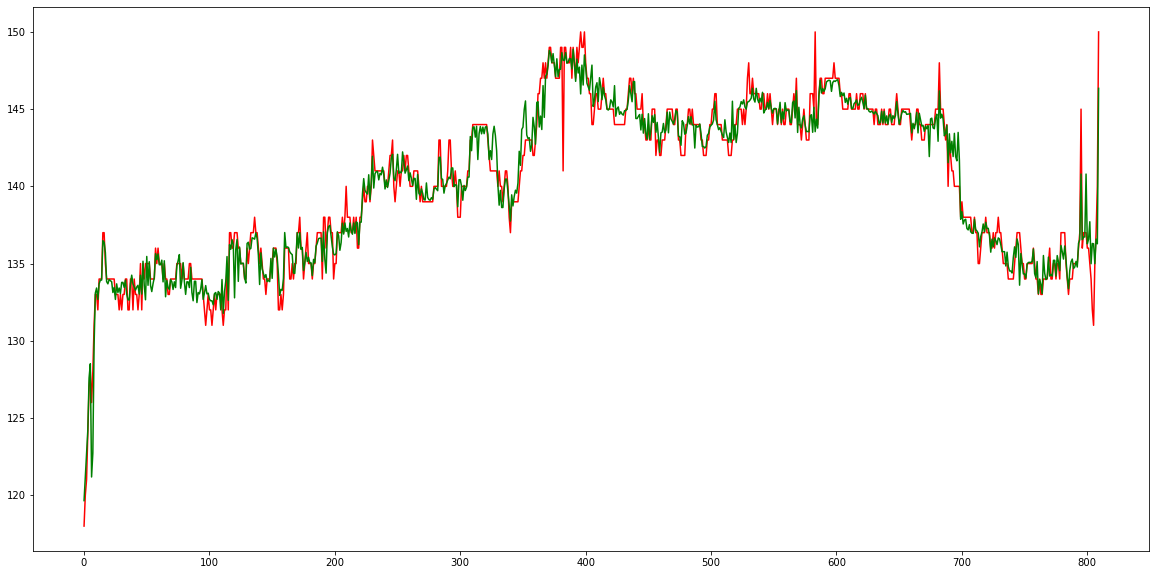

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(range(len(y)), y, 'r') # plotting t, a separately 
plt.plot(range(len(predict_rf_rf)), predict_rf_rf, 'g') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [ ]:
dm_rf['HR_predict_RF'] = predict_rf_rf
dm_rf['HR_predict_RF'] = dm_rf['HR_predict_RF'].astype('int64')

In [ ]:
dm_rf

,Timestamp,Heart_rate,Heart_rate_hand,HR_predict_RF
0,1012901438,118,117,119
1,1012901439,120,121,121
2,1012901445,121,123,122
3,1012901450,124,124,124
4,1012901453,127,132,127
...,...,...,...,...
805,1012903861,131,134,136
806,1012903877,135,129,134
807,1012903877,137,136,136
808,1012903877,140,134,136


In [ ]:
summa = 0
for k in range(810):
    if dm_rf.iloc[k,1]<dm_rf.iloc[k,3]:
        summa+=(dm_rf.iloc[k,1]/dm_rf.iloc[k,3])*100
    else:
        summa+=(dm_rf.iloc[k,3]/dm_rf.iloc[k,1])*100
summa = summa / 810
print(summa)

99.4141702162707


In [ ]:
dm_rf = dm_rf.drop(columns = 'Heart_rate')

In [258]:
dm_rf

,Timestamp,Heart_rate_hand,HR_predict_RF
0,1012901438,117,119
1,1012901439,121,121
2,1012901445,123,122
3,1012901450,124,124
4,1012901453,132,127
...,...,...,...
805,1012903861,134,136
806,1012903877,129,134
807,1012903877,136,136
808,1012903877,134,136
